In [1]:
from cn_correct import MultiCorrectionTool as MCT
import numpy as np

In [2]:
l1_list=np.linspace(1,9,10)**2
l1_list=list(1-l1_list/(max(l1_list)+1))
model_spec_list=[
    {'elastic-net':{
        'l1_ratio':l1_list,#list(1-np.logspace(-2,-.03,7)),
        'inner_cv':{'n_repeats':2,'n_splits':10,'n_jobs':1},
        'max_poly_deg':5,'fit_intercept':False}
        },
    {'lasso':{'inner_cv':{'n_repeats':2,'n_splits':10,'n_jobs':1},
              'max_poly_deg':5,'fit_intercept':False,
             'n_alphas':200
             }
        },
    {'lin-reg':{'inner_cv':{'n_repeats':2,'n_splits':10,'n_jobs':1},
                'max_poly_deg':5,'fit_intercept':False}},
    {'gbr':{
        'kwargs':{},
        'inner_cv':{'n_repeats':2,'n_splits':10,'n_jobs':1},
        'param_grid':{
            'ccp_alpha':[0.001,0.005,0.01],
            'n_estimators':[200],
            'learning_rate':[0.05,0.025],
            'subsample':[0.7],'max_depth':[3]}#these pass through to sklearn's gbr
            }
        },
    {'gbr':{
            'kwargs':{},
            'inner_cv':{'n_repeats':2,'n_splits':10,'n_jobs':1},
            'param_grid':{
                'n_estimators':[50,100,400],
                'learning_rate':[0.05,0.025],
                'subsample':[1,0.7],
                'max_depth':[2,3]}#these pass through to sklearn's gbr
                }
            },
    ]
model_spec_dict={}
for dict_i in model_spec_list:
    for key,val in dict_i.items():
        model_spec_dict[key]=val
        

In [3]:
mct=MCT(model_specs=model_spec_dict)

In [4]:
mct.runCorrections()

In [5]:
mct.selectCorrections()

In [6]:
mct.setCorrectionSelectionAccuracy()

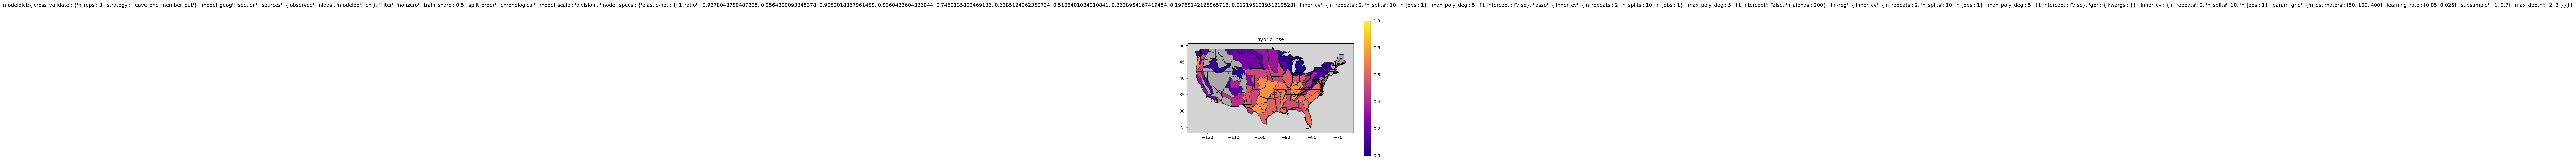

In [7]:
mct.plotGeogHybridAccuracy(plot_negative=False)